# Hyperparameter display 

![Cartpole environment](https://nav74neet.github.io/media/blog/openaigym/openaigym.jpg)

- Methods to understand the results of the study
- Smart display of the results
- Way to filter the results well


In [7]:
# Set the GPU for training
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

In [8]:
import pickle
import optuna
from fanova import fANOVA
import pandas as pd
import sklearn.feature_selection
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Unfortunately I run experiment on different servers with different optuna versions...
#!pip install optuna==1.4.0

## Import the study 

In [147]:
#Analysis

In [16]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
# bar coordinates
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

In [17]:
def plot_difference(labels,men_means,women_means):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, men_means, width, label='Var1')
    rects2 = ax.bar(x + width/2, women_means, width, label='Var2')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average reward')
    ax.set_title('Reward comparison between parameter values ')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            height = int(height)
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    ax.invert_yaxis()

    plt.show()

In [18]:
def plot_difference_2(women_means):
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rect1 = ax.bar(1, women_means[1], width, label='Layer1')
    rect2 = ax.bar(2, women_means[2], width, label='Layer3')
    rect3 = ax.bar(3, women_means[0], width, label='Layer6')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average reward')
    ax.set_title('Reward comparison between parameter values ')
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = "OOF"
    ax.set_xticklabels(labels)
    

    ax.legend()
    fig.tight_layout()
    ax.invert_yaxis()
    plt.show()

In [10]:
sumTable = pd.read_csv("saves/Acro_study_new_main.csv") 
sumTable_1 = pd.read_csv("saves/Acro_study_new_addition.csv") 
sumTable2 = pd.read_csv("saves/Cart_study_new_main.csv") 
sumTable2_1 = pd.read_csv("saves/Cart_study_new_addition.csv") 
sumTable4 = pd.read_csv("saves/Lunar_study_new_main.csv") 
sumTable4_1 = pd.read_csv("saves/Lunar_study_new_addition.csv") 
sumTable5 = pd.read_csv("saves/Acro_study_old.csv") 

In [11]:
    sumTable = sumTable.drop(columns = ["number","datetime_start","datetime_complete","state",
                                 "system_attrs_search_space","Unnamed: 0"])
    sumTable_1 = sumTable_1.drop(columns = ["number","datetime_start","duration","datetime_complete",
                                 "state","system_attrs_search_space","Unnamed: 0"])
    sumTable2 = sumTable2.drop(columns = ["number","datetime_start","duration","datetime_complete",
                                 "state","system_attrs_search_space","Unnamed: 0"])
    sumTable2_1 = sumTable2_1.drop(columns = ["number","datetime_start","duration","datetime_complete",
                                 "state","system_attrs_search_space","Unnamed: 0"])
    sumTable4 = sumTable4.drop(columns = ["number","datetime_start","datetime_complete","state",
                                 "system_attrs_search_space","Unnamed: 0"])
    sumTable4_1 = sumTable4_1.drop(columns = ["number","datetime_start","duration","datetime_complete",
                                 "state","system_attrs_search_space","Unnamed: 0"])
    sumTable5 = sumTable5.drop(columns = ["number","datetime_start","duration","datetime_complete",
                                 "state","system_attrs_search_space","Unnamed: 0"])

In [12]:
combine = [sumTable,sumTable_1]
sumTable6 = pd.concat(combine,ignore_index=True)
combine = [sumTable2,sumTable2_1]
sumTable7 = pd.concat(combine,ignore_index=True)
combine = [sumTable4,sumTable4_1]
sumTable8 = pd.concat(combine,ignore_index=True)

sumTable6["params_num_heads"] = [4] * len(sumTable6.values)
sumTable8["params_num_heads"] = [4] * len(sumTable8.values)
sumTable6 = sumTable6 [['value', 'params_custom_layer_init', 'params_custom_lr_schedule',
       'params_layer_type', 'params_loss_function',
       'params_target_update_period','params_num_heads' ]]
sumTable7 =sumTable7 [['value', 'params_custom_layer_init', 'params_custom_lr_schedule',
       'params_layer_type', 'params_loss_function',
       'params_target_update_period','params_num_heads' ]]
sumTable8 =sumTable8 [['value', 'params_custom_layer_init', 'params_custom_lr_schedule',
       'params_layer_type', 'params_loss_function',
       'params_target_update_period','params_num_heads' ]]

# Average performance AcroBot

In [14]:
X =  sumTable6.values[:,1:]
y =  sumTable6.values[:,0]
y = y *-1
features = sumTable7.columns[1:]
final = []
for w in range(len(features)):
    summary = {}
    for x in range(len(X)):
        if str(X[x][w]) in summary: 
            summary[str(X[x][w])].append(y[x])
        else:
            summary[str(X[x][w])] = [y[x]]
    row = []
    row.append(summary.keys())
    for x in summary.keys():
        row.append((np.mean(summary[x])))
    final.append(row)
pd.DataFrame(final, index = features)

,0,1,2,3
params_custom_layer_init,"(0.5, 1.0)",-251.980553,-274.958335,NaN
params_custom_lr_schedule,"(No, Transformer)",-178.783333,-348.155555,NaN
params_layer_type,"(6, 1, 3)",-242.350001,-319.916667,-228.141664
params_loss_function,"(element_wise_squared_loss, element_wise_huber...",-267.927082,-254.554167,NaN
params_target_update_period,(5),-263.469444,NaN,NaN
params_num_heads,(4),-263.469444,NaN,NaN


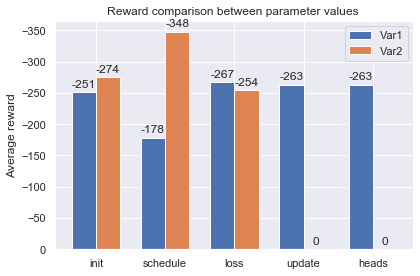

In [19]:
number1 = []
number2 = []
number3 = []
for row in final: 
    number1.append(row[1])
    if len(row) >= 3:
        number2.append(row[2])
    else: 
        number2.append(0)
    if len(row) == 4:
        number3.append(row[3])  
values = np.array([number1,number2]).T
values = np.concatenate((values[:2], values[3:]))
labels = ["init","schedule","loss","update","heads"]
sns.set()
plot_difference(labels,values[:,0],values[:,1])

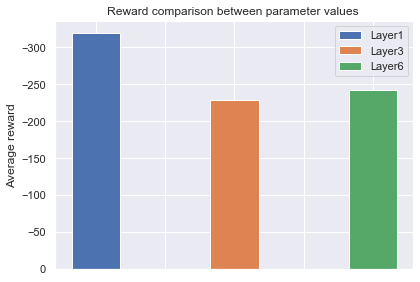

In [20]:
plot_difference_2([number1[2],number2[2],number3[0]])

# Average performance CartPole

In [21]:
X =  sumTable7.values[:,1:]
y =  sumTable7.values[:,0]
y = y *-1
features = sumTable7.columns[1:]
final = []
for w in range(len(features)):
    summary = {}
    for x in range(len(X)):
        if str(X[x][w]) in summary: 
            summary[str(X[x][w])].append(y[x])
        else:
            summary[str(X[x][w])] = [y[x]]
    row = []
    row.append(summary.keys())
    for x in summary.keys():
        row.append((np.mean(summary[x])))
    final.append(row)
pd.DataFrame(final, index = features)

,0,1,2,3
params_custom_layer_init,(0.5),93.654166,NaN,NaN
params_custom_lr_schedule,"(Transformer, No)",86.466666,100.841666,NaN
params_layer_type,"(6, 1, 3)",121.595833,76.550000,82.816666
params_loss_function,"(element_wise_squared_loss, element_wise_huber...",122.062500,36.837500,NaN
params_target_update_period,(5),93.654166,NaN,NaN
params_num_heads,"(4, 2)",92.672221,94.636112,NaN


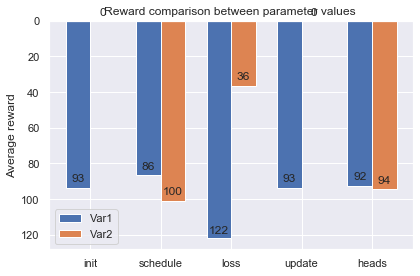

In [22]:
number1 = []
number2 = []
number3 = []
for row in final: 
    number1.append(row[1])
    if len(row) >= 3:
        number2.append(row[2])
    else: 
        number2.append(0)
    if len(row) == 4:
        number3.append(row[3])  
values = np.array([number1,number2]).T
values = np.concatenate((values[:2], values[3:]))
labels = ["init","schedule","loss","update","heads"]
sns.set()
plot_difference(labels,values[:,0],values[:,1])

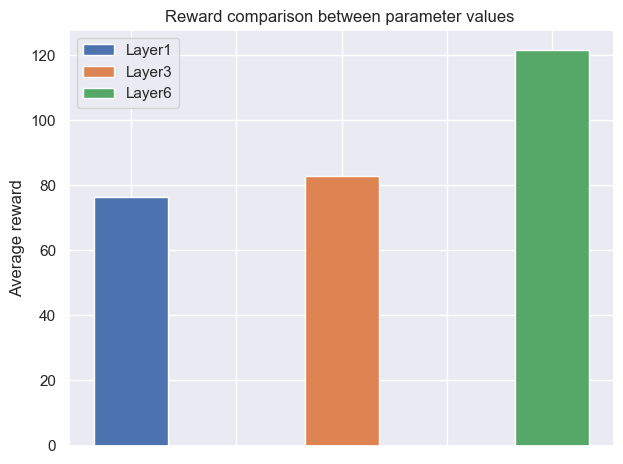

In [399]:
plot_difference_2([number1[2],number2[2],number3[0]])

# Average performance LunarLander

In [409]:
X =  sumTable8.values[:,1:]
y =  sumTable8.values[:,0]
y = y *-1
features = sumTable7.columns[1:]
final = []
for w in range(len(features)):
    summary = {}
    for x in range(len(X)):
        if str(X[x][w]) in summary: 
            summary[str(X[x][w])].append(y[x])
        else:
            summary[str(X[x][w])] = [y[x]]
    row = []
    row.append(summary.keys())
    for x in summary.keys():
        row.append((np.mean(summary[x])))
    final.append(row)
pd.DataFrame(final, index = features)

,0,1,2,3
params_custom_layer_init,"(0.5, 1.0)",-398.553477,-384.767380,NaN
params_custom_lr_schedule,"(No, Transformer)",-266.192350,-517.128507,NaN
params_layer_type,"(6, 3, 1)",-509.182407,-258.685053,-407.113825
params_loss_function,(element_wise_huber_loss),-391.660428,NaN,NaN
params_target_update_period,"(5, 10)",-417.154460,-366.166397,NaN
params_num_heads,(4),-391.660428,NaN,NaN


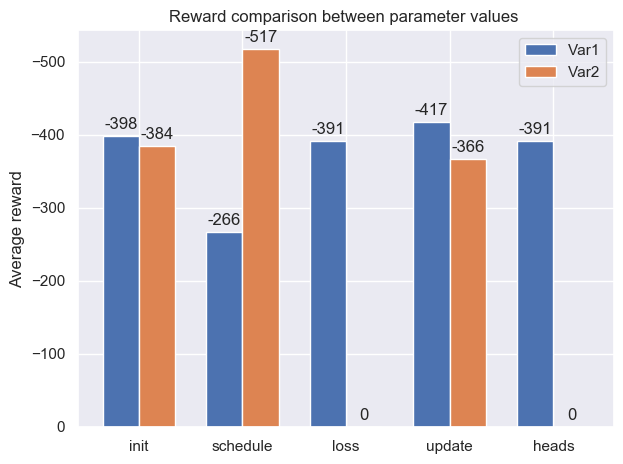

In [413]:
number1 = []
number2 = []
number3 = []
for row in final: 
    number1.append(row[1])
    if len(row) >= 3:
        number2.append(row[2])
    else: 
        number2.append(0)
    if len(row) == 4:
        number3.append(row[3])  
values = np.array([number1,number2]).T
values = np.concatenate((values[:2], values[3:]))
labels = ["init","schedule","loss","update","heads"]
sns.set()
plot_difference(labels,values[:,0],values[:,1])

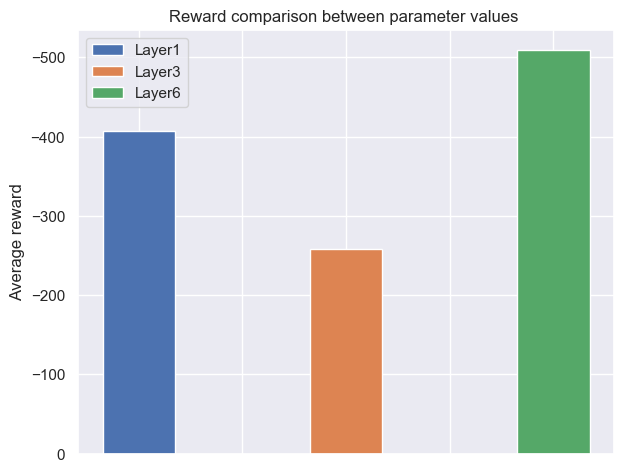

In [415]:
plot_difference_2([number1[2],number3[0],number2[2]])

# Top runs

In [20]:
# Acro
sumTable6.loc[sumTable6['value']< 175]

,value,params_custom_layer_init,params_custom_lr_schedule,params_layer_type,params_loss_function,params_target_update_period,params_num_heads
0,168.699997,0.5,No,6,element_wise_squared_loss,5,4
1,151.750000,1.0,No,6,element_wise_squared_loss,5,4
3,164.799988,0.5,No,6,element_wise_squared_loss,5,4
12,152.049988,1.0,No,6,element_wise_squared_loss,5,4
21,170.050003,0.5,No,1,element_wise_squared_loss,5,4
26,173.250000,1.0,No,3,element_wise_huber_loss,5,4
27,142.100006,0.5,No,1,element_wise_huber_loss,5,4
34,164.250000,0.5,No,3,element_wise_huber_loss,5,4


In [22]:
#CartPole
sumTable7.loc[sumTable7['value']< -160]

,value,params_custom_layer_init,params_custom_lr_schedule,params_layer_type,params_loss_function,params_target_update_period,params_num_heads
1,-164.300003,0.5,No,6,element_wise_squared_loss,5,2
11,-183.949997,0.5,No,3,element_wise_squared_loss,5,4
14,-216.699997,0.5,No,3,element_wise_squared_loss,5,4
15,-197.850006,0.5,Transformer,6,element_wise_squared_loss,5,2
20,-160.199997,0.5,No,6,element_wise_squared_loss,5,4


In [17]:
# LunarLander
sumTable8.loc[sumTable8['value']< 140]

,value,params_custom_layer_init,params_custom_lr_schedule,params_layer_type,params_loss_function,params_target_update_period,params_num_heads
1,-250.870392,1.0,No,3,element_wise_huber_loss,10,4
15,-204.855835,1.0,No,3,element_wise_huber_loss,5,4
22,-128.607437,0.5,No,1,element_wise_huber_loss,10,4


# Cross studies

In [7]:
study = pd.read_csv("Acro_study_cross.csv") 
study2 = pd.read_csv("CartPole_study_cross.csv") 
study3 = pd.read_csv("Lunar_study_cross.csv") 
study_1 = pd.read_csv("Acro_study_cross_2.csv") 

In [8]:
study = study [['value', 'params_custom_layer_init', 'params_custom_lr_schedule',
       'params_layer_type', 'params_loss_function',
       'params_target_update_period','params_num_heads' ]]
study2 = study2 [['value', 'params_custom_layer_init', 'params_custom_lr_schedule',
       'params_layer_type', 'params_loss_function',
       'params_target_update_period','params_num_heads' ]]
study3 = study3 [['value', 'params_custom_layer_init', 'params_custom_lr_schedule',
       'params_layer_type', 'params_loss_function',
       'params_target_update_period','params_num_heads' ]]
study_1 = study_1 [['value', 'params_custom_layer_init', 'params_custom_lr_schedule',
       'params_layer_type', 'params_loss_function',
       'params_target_update_period','params_num_heads' ]]

# Acro cross study

In [40]:
study

,value,params_custom_layer_init,params_custom_lr_schedule,params_layer_type,params_loss_function,params_target_update_period,params_num_heads
0,154.549988,0.5,No,3,element_wise_huber_loss,5,2
1,172.850006,0.5,No,3,element_wise_huber_loss,10,2
2,147.350006,0.5,No,1,element_wise_huber_loss,10,2
3,155.250000,0.5,No,1,element_wise_huber_loss,10,4
4,143.649994,0.5,No,1,element_wise_huber_loss,5,4
5,168.700012,0.5,No,3,element_wise_huber_loss,10,4
6,138.549988,0.5,No,1,element_wise_huber_loss,5,2
7,202.399994,0.5,No,3,element_wise_huber_loss,5,4


In [41]:
X =  study.values[:,1:]
y =  study.values[:,0]
y = y *-1
features = study.columns[1:]
final = []
for w in range(len(features)):
    summary = {}
    for x in range(len(X)):
        if str(X[x][w]) in summary: 
            summary[str(X[x][w])].append(y[x])
        else:
            summary[str(X[x][w])] = [y[x]]
    row = []
    row.append(summary.keys())
    for x in summary.keys():
        row.append((np.mean(summary[x])))
    final.append(row)
pd.DataFrame(final, index = features)

,0,1,2
params_custom_layer_init,(0.5),-160.412498,NaN
params_custom_lr_schedule,(No),-160.412498,NaN
params_layer_type,"(3, 1)",-174.625000,-146.199997
params_loss_function,(element_wise_huber_loss),-160.412498,NaN
params_target_update_period,"(5, 10)",-159.787491,-161.037506
params_num_heads,"(2, 4)",-153.324997,-167.500000


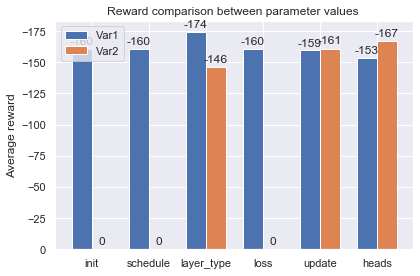

In [43]:
number1 = []
number2 = []
number3 = []
for row in final: 
    number1.append(row[1])
    if len(row) >= 3:
        number2.append(row[2])
    else: 
        number2.append(0)
    if len(row) == 4:
        number3.append(row[3])  
values = np.array([number1,number2]).T
labels = ["init","schedule","layer_type","loss","update","heads"]
sns.set()
plot_difference(labels,values[:,0],values[:,1])

In [9]:
study_1  #nothing special

,value,params_custom_layer_init,params_custom_lr_schedule,params_layer_type,params_loss_function,params_target_update_period,params_num_heads
0,160.800003,1,No,6,element_wise_squared_loss,10,2
1,160.799988,1,No,6,element_wise_squared_loss,5,2
2,148.250000,1,No,6,element_wise_squared_loss,10,4
3,167.199997,1,No,6,element_wise_squared_loss,5,4


# CartPole cross study

In [34]:
study2

,value,params_custom_layer_init,params_custom_lr_schedule,params_layer_type,params_loss_function,params_target_update_period,params_num_heads
0,-105.449997,1.0,No,6,element_wise_squared_loss,10,4
1,-9.550000,0.5,No,6,element_wise_squared_loss,5,4
2,-196.100006,0.5,No,3,element_wise_squared_loss,10,4
3,-201.500000,1.0,No,3,element_wise_squared_loss,10,4
4,-153.449997,1.0,No,6,element_wise_squared_loss,5,4
5,-160.899994,1.0,No,3,element_wise_squared_loss,5,4
6,-177.699997,0.5,No,3,element_wise_squared_loss,5,4
7,-158.350006,0.5,No,6,element_wise_squared_loss,10,4


In [35]:
X =  study2.values[:,1:]
y =  study2.values[:,0]
y = y *-1
features = study2.columns[1:]
final = []
for w in range(len(features)):
    summary = {}
    for x in range(len(X)):
        if str(X[x][w]) in summary: 
            summary[str(X[x][w])].append(y[x])
        else:
            summary[str(X[x][w])] = [y[x]]
    row = []
    row.append(summary.keys())
    for x in summary.keys():
        row.append((np.mean(summary[x])))
    final.append(row)
pd.DataFrame(final, index = features)

,0,1,2
params_custom_layer_init,"(1.0, 0.5)",155.324997,135.425002
params_custom_lr_schedule,(No),145.375000,NaN
params_layer_type,"(6, 3)",106.700000,184.049999
params_loss_function,(element_wise_squared_loss),145.375000,NaN
params_target_update_period,"(10, 5)",165.350002,125.399997
params_num_heads,(4),145.375000,NaN


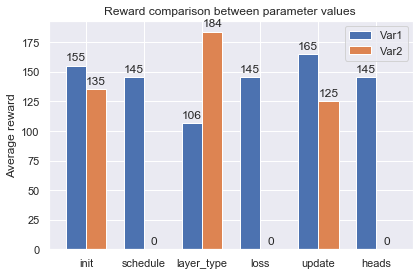

In [36]:
number1 = []
number2 = []
number3 = []
for row in final: 
    number1.append(row[1])
    if len(row) >= 3:
        number2.append(row[2])
    else: 
        number2.append(0)
    if len(row) == 4:
        number3.append(row[3])  
values = np.array([number1,number2]).T
labels = ["init","schedule","layer_type","loss","update","heads"]
sns.set()
plot_difference(labels,values[:,0],values[:,1])

# LunarLander cross study

In [37]:
study3

,value,params_custom_layer_init,params_custom_lr_schedule,params_layer_type,params_loss_function,params_target_update_period,params_num_heads
0,-91.938004,1,No,3,element_wise_huber_loss,10,4
1,-111.694763,1,No,3,element_wise_squared_loss,5,2
2,-216.704956,1,No,3,element_wise_huber_loss,5,2
3,-151.146942,1,No,3,element_wise_squared_loss,10,4
4,206.470276,1,No,3,element_wise_huber_loss,10,2
5,-194.101349,1,No,3,element_wise_huber_loss,5,4
6,225.068359,1,No,3,element_wise_squared_loss,5,4
7,-174.794769,1,No,3,element_wise_squared_loss,10,2


In [38]:
X =  study3.values[:,1:]
y =  study3.values[:,0]
y = y *-1
features = study3.columns[1:]
final = []
for w in range(len(features)):
    summary = {}
    for x in range(len(X)):
        if str(X[x][w]) in summary: 
            summary[str(X[x][w])].append(y[x])
        else:
            summary[str(X[x][w])] = [y[x]]
    row = []
    row.append(summary.keys())
    for x in summary.keys():
        row.append((np.mean(summary[x])))
    final.append(row)
pd.DataFrame(final, index = features)

,0,1,2
params_custom_layer_init,(1),63.605268,NaN
params_custom_lr_schedule,(No),63.605268,NaN
params_layer_type,(3),63.605268,NaN
params_loss_function,"(element_wise_huber_loss, element_wise_squared...",74.068508,53.142029
params_target_update_period,"(10, 5)",52.852360,74.358177
params_num_heads,"(4, 2)",53.029484,74.181053


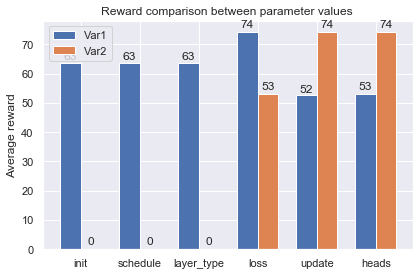

In [39]:
number1 = []
number2 = []
number3 = []
for row in final: 
    number1.append(row[1])
    if len(row) >= 3:
        number2.append(row[2])
    else: 
        number2.append(0)
    if len(row) == 4:
        number3.append(row[3])  
values = np.array([number1,number2]).T
labels = ["init","schedule","layer_type","loss","update","heads"]
sns.set()
plot_difference(labels,values[:,0],values[:,1])